# Лабораторная работа 1. Введение в машинное обучение. Обучение с учителем. Задача регрессии

<b>Традиционное предупреждение для всех лабораторных работ:</b> перед обучением моделей необходимо выполнить предварительную обработку данных, которая <b>обязательно</b> включает в себя:
- заполнение пропущенных значений (рекомедуется логика заполнения пропусков на основе типа данных, которая использовалась в РГР по Практикуму);
- преобразование категориальных признаков в числовые (используйте one-hot кодирование или map; используйте знания с Практикума).

Предобработка может включать в себя другие действия, но выполнение описанных выше действий обязательно.

Сделайте это один раз и сохраните в отдельный csv файл, а потом его используйте.

<b>Выполните следующие задания:</b>
- загрузите датасет для регрессии, выделите целевой признак и предикторы, разбейте данные на обучающую и тестовую выборку;
- решите задачу регрессии на ваших данных с использованием моделей sklearn (линейная регрессия + L1, L2), для моделей с регуляризациями подберите гиперпараметр;
- решите задачу регрессии на ваших данных с использованием моделей sklearn (полиномиальная регрессия + L1, L2), для моделей с регуляризациями подберите гиперпараметр;
- вычислите значения метрик $R^2$, MAE, MSE, RMSE, MAPE для всех обученных моделей; выберите лучшую модель;
- самостоятельно реализуйте (желательно в виде класса) модель линейной регрессии с регуляризацией (можете выбрать L1 или L2);
- самостоятельно реализуйте вычисление всех используемых метрик (в виде функций, принимающих два аргумента);
- обучите вашу модель линейной регрессии на ваших данных; оцените качество с помощью реализованных вами метрик.

# Импорт

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import matplotlib.gridspec as gridspec
# omsky_gamedev

# Загрузка датасета для регрессии.

In [25]:
models = pd.read_csv('../Data/energy_task_moded.csv')
models

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,day,month,year,time
0,60.0,30.0,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,...,6.60,733.5,92.000000,7.000000,63.000000,5.3,11.0,1.0,2016.0,1020.0
1,60.0,30.0,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,...,6.48,733.6,92.000000,6.666667,59.166667,5.2,11.0,1.0,2016.0,1030.0
2,50.0,30.0,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,...,6.37,733.7,92.000000,6.333333,55.333333,5.1,11.0,1.0,2016.0,1040.0
3,50.0,40.0,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,...,6.25,733.8,92.000000,6.000000,51.500000,5.0,11.0,1.0,2016.0,1050.0
4,60.0,40.0,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,...,6.13,733.9,92.000000,5.666667,47.666667,4.9,11.0,1.0,2016.0,1060.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,100.0,0.0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,...,22.70,755.2,55.666667,3.333333,23.666667,13.3,27.0,5.0,2016.0,1040.0
19731,90.0,0.0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,...,22.60,755.2,56.000000,3.500000,24.500000,13.3,27.0,5.0,2016.0,1050.0
19732,270.0,10.0,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,...,22.50,755.2,56.333333,3.666667,25.333333,13.3,27.0,5.0,2016.0,1060.0
19733,420.0,10.0,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,...,22.30,755.2,56.666667,3.833333,26.166667,13.2,27.0,5.0,2016.0,1070.0


# Разбиваем на выборку

In [26]:
X_train, X_test, y_train, y_test = train_test_split(models.drop('Appliances', axis=1), models['Appliances'], test_size=0.5)


# <b>Линейная регресия</b>

## Обычная линейная регресия (без гиппер параметра).

### Обуение

In [27]:
line_regression_classic = LinearRegression().fit(X_train, y_train)
line_regression_classic.predict(X_test)

array([ 28.70546573,  94.18114805,  95.44668261, ...,  10.47052872,
       108.06359934,  93.6330288 ])

### Значения ошибок: <br>
- средней абсолютной ошибки;
- средней квадраттичной ошибки (MSE);
- средней квадраттичной ошибки под корнем (RMSE);
- средней абсолютной процентной ошибки;

In [28]:
y_predicted = line_regression_classic.predict(X_test)
line_regression_classic_errors = {'MAE': mean_absolute_error(y_predicted, y_test), 
                          'RMSE': mean_squared_error(y_predicted, y_test),
                          'MSE': mean_squared_error(y_predicted, y_test)**0.5,
                          'MAPE': mean_absolute_percentage_error(y_predicted, y_test),
                          'R^2': line_regression_classic.score(X_test, y_test)}
print(f"MAE: {mean_absolute_error(y_predicted, y_test)}",
      f'RMSE: {mean_squared_error(y_predicted, y_test)}',
      f'MSE: {mean_squared_error(y_predicted, y_test)**0.5}',
      f'MAPE: {mean_absolute_percentage_error(y_predicted, y_test)}',
      f'R^2: {line_regression_classic.score(X_test, y_test)}',
      sep='\n')


MAE: 54.01025733967201
RMSE: 9396.500420295859
MSE: 96.93554776394394
MAPE: 0.5864299687690234
R^2: 0.1547738606466028


### Значение весов.

In [29]:
print(len(line_regression_classic.coef_), line_regression_classic.coef_, sep='\n')


29
[ 1.85401392e+00 -8.39844727e+00  1.32765582e+01 -1.39881378e+01
 -1.13033366e+01  2.73235931e+01  4.23450504e+00 -4.09361609e-01
 -9.59532467e-01  2.20756809e-01  8.73307803e-02  5.79025776e+00
 -9.52189591e-02  5.30516974e-01 -2.04302777e+00  7.41390780e+00
 -3.62417985e+00 -9.74390866e+00 -5.54390861e-01 -3.38953582e+00
  1.05734788e-02  6.30199116e-01  1.80295950e+00  1.06525547e-01
 -1.26166918e+00 -2.86430900e-01 -1.44039731e+01  0.00000000e+00
  1.71218292e-02]


### Предварительные результаты

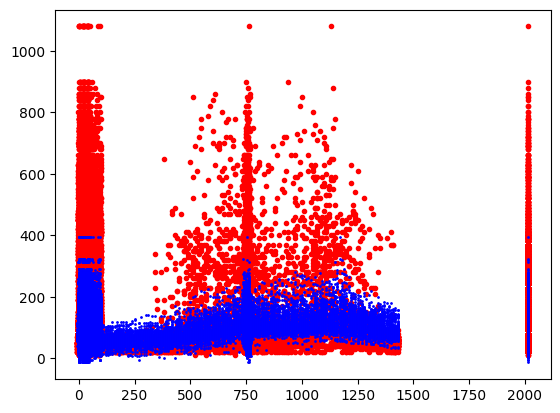

In [30]:
plt.plot(X_test, y_test, 'ro', markersize=3)
plt.plot(X_test, line_regression_classic.predict(X_test), 'bo', markersize=1)

## Ridge (линейная регрессия + L1)

### Ridge - подборка гиппер параметра $\alpha$

In [31]:
ridge_optimal_for_line_regression = GridSearchCV(Ridge(), {'alpha': np.arange(0, 100, 1)}).fit(X_train, y_train)
ridge_optimal_for_line_regression.best_params_

{'alpha': 68}

In [32]:
i = 10
a = 0
b = 1000
while i > 0.0001:
    ridge_optimal_for_line_regression = GridSearchCV(Ridge(), {'alpha': np.arange(a, b, i)}).fit(X_train, y_train)
    if (ridge_optimal_for_line_regression.best_params_['alpha'] == 0):
        break
    elif (ridge_optimal_for_line_regression.best_params_['alpha'] != b):
        a = ridge_optimal_for_line_regression.best_params_['alpha']-i
        b = ridge_optimal_for_line_regression.best_params_['alpha']+i
        i/=10
    else:
        a = b
        b*=2

ridge_optimal_for_line_regression.best_params_['alpha']  


    

68.48

### Ridge - обучение с подобранным гиппер параметрам $\alpha$

In [33]:
line_regression_ridge = Ridge(alpha=ridge_optimal_for_line_regression.best_params_['alpha']).fit(X_train, y_train)
y_result = line_regression_ridge.predict(X_test)
line_regression_ridge_errors = {'MAE': mean_absolute_error(y_predicted, y_test),
                                'RMSE': mean_squared_error(y_predicted, y_test),
                                'MSE': mean_squared_error(y_predicted, y_test)**0.5,
                                'MAPE': mean_absolute_percentage_error(y_predicted, y_test),
                                'R^2': line_regression_classic.score(X_test, y_test)}
print(f"MAE: {mean_absolute_error(y_result, y_test)}",
      f'RMSE: {mean_squared_error(y_result, y_test)}',
      f'MSE: {mean_squared_error(y_result, y_test)**0.5}',
      f'MAPE: {mean_absolute_percentage_error(y_result, y_test)}',
      f'R^2: {ridge_optimal_for_line_regression.score(X_test, y_test)}',
      sep='\n')
line_regression_ridge.coef_

MAE: 53.960809657671454
RMSE: 9395.767814975845
MSE: 96.93176886333936
MAPE: 0.5676219034951072
R^2: 0.15483975934703464


array([ 1.86329939e+00, -8.06331094e+00,  1.31404008e+01, -1.34781840e+01,
       -1.10586837e+01,  2.66494335e+01,  4.26710981e+00, -5.90030359e-01,
       -1.01165258e+00,  6.77631291e-02,  8.86262622e-02,  5.71379618e+00,
       -8.74263815e-02,  4.38092618e-01, -2.05706010e+00,  7.21501980e+00,
       -3.60204297e+00, -9.40008085e+00, -5.22621817e-01, -3.36335343e+00,
        4.17631884e-03,  6.09701358e-01,  1.81676186e+00,  1.06117693e-01,
       -1.30647056e+00, -2.62136074e-01, -1.36166976e+01,  0.00000000e+00,
        1.71646150e-02])

## Lasso (линейная регрессия + L2)

### Lasso - подборка гиппер параметра $\alpha$

In [34]:
lasso_optimal_for_line_regression = GridSearchCV(Lasso(), {'alpha': np.arange(0, 100, 1)}).fit(X_train, y_train)
lasso_optimal_for_line_regression.best_params_

c:\Users\Mike\Desktop\4semak\Maching_learning\Maching_Learning\lib\site-packages\sklearn\model_selection\_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\Mike\Desktop\4semak\Maching_learning\Maching_Learning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\Mike\Desktop\4semak\Maching_learning\Maching_Learning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.163e+07, tolerance: 7.708e+03 Linear regression models with null weight for the l1 regularization term are more

{'alpha': 0}

In [35]:
i = 10
a = 0
b = 1000
while i > 0.0001:
    lasso_optimal_for_line_regression = GridSearchCV(Lasso(), {'alpha': np.arange(0, 100, 1)}).fit(X_train, y_train)
    if (lasso_optimal_for_line_regression.best_params_['alpha'] == 0):
        break
    elif (lasso_optimal_for_line_regression.best_params_['alpha'] != b):
        a = lasso_optimal_for_line_regression.best_params_['alpha']-i
        b = lasso_optimal_for_line_regression.best_params_['alpha']+i
        i/=10
    else:
        a = b
        b*=2

lasso_optimal_for_line_regression.best_params_

c:\Users\Mike\Desktop\4semak\Maching_learning\Maching_Learning\lib\site-packages\sklearn\model_selection\_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\Mike\Desktop\4semak\Maching_learning\Maching_Learning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\Mike\Desktop\4semak\Maching_learning\Maching_Learning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.163e+07, tolerance: 7.708e+03 Linear regression models with null weight for the l1 regularization term are more

{'alpha': 0}

### Lasso - обучение с подобранным гиппер параметрам $\alpha$

In [36]:
line_regression_lasso = Lasso(alpha=lasso_optimal_for_line_regression.best_params_['alpha']).fit(X_train, y_train)
y_predict = line_regression_lasso.predict(X_test)
line_regression_ridge_lasso = {'MAE': mean_absolute_error(y_predicted, y_test),
                               'RMSE': mean_squared_error(y_predicted, y_test),
                               'MSE': mean_squared_error(y_predicted, y_test)**0.5,
                               'MAPE': mean_absolute_percentage_error(y_predicted, y_test),
                               'R^2': line_regression_lasso.score(X_test, y_test)}
print(f"MAE: {mean_absolute_error(y_predict, y_test)}",
      f'RMSE: {mean_squared_error(y_predict, y_test)}',
      f'MSE: {mean_squared_error(y_predict, y_test)**0.5}',
      f'MAPE: {mean_absolute_percentage_error(y_predict, y_test)}',
      f'R^2: {line_regression_lasso.score(X_test, y_test)}',
      sep='\n')
line_regression_lasso.coef_

C:\Users\Mike\AppData\Local\Temp\ipykernel_12032\4113133536.py:1: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  line_regression_lasso = Lasso(alpha=lasso_optimal_for_line_regression.best_params_['alpha']).fit(X_train, y_train)
c:\Users\Mike\Desktop\4semak\Maching_learning\Maching_Learning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(


MAE: 54.0102573396719
RMSE: 9396.50042029586
MSE: 96.93554776394396
MAPE: 0.5864299687690511
R^2: 0.1547738606466027


c:\Users\Mike\Desktop\4semak\Maching_learning\Maching_Learning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.019e+07, tolerance: 9.770e+03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


array([ 1.85401392e+00, -8.39844727e+00,  1.32765582e+01, -1.39881378e+01,
       -1.13033366e+01,  2.73235931e+01,  4.23450504e+00, -4.09361609e-01,
       -9.59532467e-01,  2.20756809e-01,  8.73307803e-02,  5.79025776e+00,
       -9.52189591e-02,  5.30516974e-01, -2.04302777e+00,  7.41390780e+00,
       -3.62417985e+00, -9.74390866e+00, -5.54390861e-01, -3.38953582e+00,
        1.05734788e-02,  6.30199116e-01,  1.80295950e+00,  1.06525547e-01,
       -1.26166918e+00, -2.86430900e-01, -1.44039731e+01,  0.00000000e+00,
        1.71218292e-02])

# <b>Полиномиальная регрессия</b>

In [37]:
power = 2

## Обычная полиномиальная регрессия (без гиппер параметра).

In [38]:
polynomial_regression_classic = LinearRegression().fit(PolynomialFeatures(power).fit_transform(X_train), y_train)
y_predicted = polynomial_regression_classic.predict(PolynomialFeatures(power).fit_transform(X_test))
print(f"MAE: {mean_absolute_error(y_predict, y_test)}",
      f'RMSE: {mean_squared_error(y_predict, y_test)}',
      f'MSE: {mean_squared_error(y_predict, y_test)**0.5}',
      f'MAPE: {mean_absolute_percentage_error(y_predict, y_test)}',
      f'R^2: {polynomial_regression_classic.score(PolynomialFeatures(power).fit_transform(X_test), y_test)}',
      sep='\n')
polynomial_regression_classic.coef_

MAE: 54.0102573396719
RMSE: 9396.50042029586
MSE: 96.93554776394396
MAPE: 0.5864299687690511
R^2: 0.27129080301133646


array([-8.56882651e-11,  1.08369351e-06,  2.23067816e-04,  5.81105866e-06,
        2.63077370e-05,  2.04611712e-05, -1.80650956e-04,  1.76411837e-04,
       -7.30990776e-05, -3.90945136e-05,  1.47371626e-04, -5.57776210e-06,
        1.16925805e-04,  1.68559991e-05, -3.40939064e-04,  6.79645869e-05,
        1.63659657e-04, -7.16051700e-05,  4.74284173e-05, -1.46442906e-05,
        6.38576748e-05,  1.63169354e-06, -3.86254855e-07, -2.50429405e-05,
       -2.50482451e-06, -2.00776558e-04,  1.87431135e-05,  4.94480137e-04,
       -9.06411424e-11, -3.40955039e-07, -3.94589097e-02, -4.20484229e-01,
        2.70414367e-01, -8.59782175e-01, -5.20786912e-01, -9.88567669e-02,
       -2.74555144e-01, -2.40556807e-01,  2.92098068e-01,  6.98693611e-01,
       -3.02581794e-02,  2.24272079e-01,  3.08733627e-02,  9.67492723e-01,
        2.55444150e-02, -4.87214551e-01,  3.51905155e-02, -4.23268172e-01,
        3.69725212e-02,  5.52121407e-02,  3.34153672e-02, -3.05220136e-02,
       -1.35503436e-01,  

## Ridge (Полиномиальная регрессия + L1)

### Ridge (полиномиальная регрессия) - подборка гиппер параметра $\alpha$

In [39]:
ridge_optimal_for_polynomial_regression = GridSearchCV(Ridge(), {'alpha': np.arange(1, 3, 1)}).fit(PolynomialFeatures(power).fit_transform(X_train), y_train)
ridge_optimal_for_polynomial_regression.best_params_

c:\Users\Mike\Desktop\4semak\Maching_learning\Maching_Learning\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.10079e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\Mike\Desktop\4semak\Maching_learning\Maching_Learning\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.13435e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\Mike\Desktop\4semak\Maching_learning\Maching_Learning\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.15899e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\Mike\Desktop\4semak\Maching_learning\Maching_Learning\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.06179e-17): result may not be

{'alpha': 2}

In [40]:
i = 10
a = 0
b = 1000
while i > 0.0001:
    ridge_optimal_for_polynomial_regression = GridSearchCV(Ridge(), {'alpha': np.arange(1, 3, 1)}).fit(PolynomialFeatures(power).fit_transform(X_train), y_train)
    if (ridge_optimal_for_polynomial_regression.best_params_['alpha'] == 0):
        break
    elif (ridge_optimal_for_polynomial_regression.best_params_['alpha'] != b):
        a = ridge_optimal_for_polynomial_regression.best_params_['alpha']-i
        b = ridge_optimal_for_polynomial_regression.best_params_['alpha']+i
        i/=10
    else:
        a = b
        b*=2

ridge_optimal_for_polynomial_regression.best_params_

c:\Users\Mike\Desktop\4semak\Maching_learning\Maching_Learning\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.10079e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\Mike\Desktop\4semak\Maching_learning\Maching_Learning\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.13435e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\Mike\Desktop\4semak\Maching_learning\Maching_Learning\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.15899e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\Mike\Desktop\4semak\Maching_learning\Maching_Learning\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.06179e-17): result may not be

{'alpha': 2}

### Ridge (полиномиальная регрессия) - обучение с подобранным гиппер параметрам $\alpha$

In [41]:
polynomial_regression_ridge = Ridge(alpha=ridge_optimal_for_polynomial_regression.best_params_['alpha']).fit(PolynomialFeatures(power).fit_transform(X_train), y_train)
y_result = polynomial_regression_ridge.predict(PolynomialFeatures(power).fit_transform(X_test))
polynomial_regression_ridge_errors = {'MAE': mean_absolute_error(y_predicted, y_test),
                                      'RMSE': mean_squared_error(y_predicted, y_test),
                                      'MSE': mean_squared_error(y_predicted, y_test)**0.5,
                                      'MAPE': mean_absolute_percentage_error(y_predicted, y_test),
                                      'R^2': polynomial_regression_ridge.score(PolynomialFeatures(power).fit_transform(X_test), y_test)}
print(f"MAE: {mean_absolute_error(y_result, y_test)}",
      f'RMSE: {mean_squared_error(y_result, y_test)}',
      f'MSE: {mean_squared_error(y_result, y_test)**0.5}',
      f'MAPE: {mean_absolute_percentage_error(y_result, y_test)}',
      f'R^2: {polynomial_regression_ridge.score(PolynomialFeatures(power).fit_transform(X_test), y_test)}',
      sep='\n')
polynomial_regression_ridge.coef_

MAE: 51.01708008515968
RMSE: 8099.372362382148
MSE: 89.99651305679653
MAPE: 1.2439124148125167
R^2: 0.2714520377974591


array([ 0.00000000e+00,  1.12719807e-06,  2.19529549e-04,  5.02062076e-06,
        2.82757455e-05,  2.13792780e-05, -1.79002916e-04,  1.76039533e-04,
       -7.32285448e-05, -3.89373918e-05,  1.46316289e-04, -5.56193629e-06,
        1.16193909e-04,  1.53201001e-05, -3.39127336e-04,  6.75467286e-05,
        1.63015057e-04, -7.15405175e-05,  4.76751133e-05, -1.46639832e-05,
        6.39345609e-05,  1.68106472e-06, -3.32488455e-07, -2.49529630e-05,
       -2.49527007e-06, -2.00071865e-04,  1.86509998e-05,  4.92465016e-04,
        0.00000000e+00, -5.33136807e-07, -3.94612568e-02, -4.17055445e-01,
        2.70157960e-01, -8.62335026e-01, -5.21670423e-01, -1.00310568e-01,
       -2.73591678e-01, -2.39989805e-01,  2.92044915e-01,  6.99866689e-01,
       -3.02277563e-02,  2.24241287e-01,  3.08600339e-02,  9.66912159e-01,
        2.58216599e-02, -4.87223077e-01,  3.46487051e-02, -4.26287810e-01,
        3.73871764e-02,  5.36874273e-02,  3.33190571e-02, -3.07748535e-02,
       -1.35539591e-01,  

## Lasso (Полиномиальная регрессия + L1)

### Lasso (полиномиальная регрессия) - обучение с подобранным гиппер параметрам $\alpha$

In [42]:
lasso_optimal_for_polynomial_regression = GridSearchCV(Lasso(), {'alpha': np.arange(1, 3, 1)}).fit(PolynomialFeatures(power).fit_transform(X_train), y_train)
lasso_optimal_for_polynomial_regression.best_params_

c:\Users\Mike\Desktop\4semak\Maching_learning\Maching_Learning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.818e+07, tolerance: 7.708e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\Mike\Desktop\4semak\Maching_learning\Maching_Learning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.818e+07, tolerance: 7.811e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\Mike\Desktop\4semak\Maching_learning\Maching_Learning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of i

{'alpha': 1}

In [43]:
i = 10
a = 0
b = 1000
while i > 0.0001:
    lasso_optimal_for_polynomial_regression = GridSearchCV(Lasso(), {'alpha': np.arange(1, 3, 1)}).fit(PolynomialFeatures(power).fit_transform(X_train), y_train)
    if (lasso_optimal_for_polynomial_regression.best_params_['alpha'] == 0):
        break
    elif (lasso_optimal_for_polynomial_regression.best_params_['alpha'] != b):
        a = lasso_optimal_for_polynomial_regression.best_params_['alpha']-i
        b = lasso_optimal_for_polynomial_regression.best_params_['alpha']+i
        i/=10
    else:
        a = b
        b*=2

lasso_optimal_for_polynomial_regression.best_params_

c:\Users\Mike\Desktop\4semak\Maching_learning\Maching_Learning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.818e+07, tolerance: 7.708e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\Mike\Desktop\4semak\Maching_learning\Maching_Learning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.818e+07, tolerance: 7.811e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\Mike\Desktop\4semak\Maching_learning\Maching_Learning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of i

{'alpha': 1}

### Lasso (полиномиальная регрессия) - обучение с подобранным гиппер параметрам $\alpha$

In [44]:
polynomial_regression_lasso = Ridge(alpha=lasso_optimal_for_polynomial_regression.best_params_['alpha']).fit(PolynomialFeatures(power).fit_transform(X_train), y_train)
y_result = polynomial_regression_lasso.predict(PolynomialFeatures(power).fit_transform(X_test))
polynomial_regression_lasso_errors = {'MAE': mean_absolute_error(y_predicted, y_test),
                                      'RMSE': mean_squared_error(y_predicted, y_test),
                                      'MSE': mean_squared_error(y_predicted, y_test)**0.5,
                                      'MAPE': mean_absolute_percentage_error(y_predicted, y_test),
                                      'R^2': polynomial_regression_lasso.score(PolynomialFeatures(power).fit_transform(X_test), y_test)}
print(f"MAE: {mean_absolute_error(y_result, y_test)}",
      f'RMSE: {mean_squared_error(y_result, y_test)}',
      f'MSE: {mean_squared_error(y_result, y_test)**0.5}',
      f'MAPE: {mean_absolute_percentage_error(y_result, y_test)}',
      f'R^2: {polynomial_regression_lasso.score(PolynomialFeatures(power).fit_transform(X_test), y_test)}',
      sep='\n')
polynomial_regression_lasso.coef_

c:\Users\Mike\Desktop\4semak\Maching_learning\Maching_Learning\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.68659e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


MAE: 51.02457781169387
RMSE: 8100.25354061257
MSE: 90.00140854793646
MAPE: 1.090294877941208
R^2: 0.27137277479097066


array([ 0.00000000e+00,  1.18591302e-06,  2.21269060e-04,  5.47682155e-06,
        2.72580746e-05,  2.10729132e-05, -1.79750119e-04,  1.76333546e-04,
       -7.31238352e-05, -3.90199692e-05,  1.46956568e-04, -5.50825039e-06,
        1.16641535e-04,  1.59885805e-05, -3.39951238e-04,  6.74859897e-05,
        1.63402810e-04, -7.15983128e-05,  4.75843461e-05, -1.46787450e-05,
        6.32441424e-05,  1.61057818e-06, -2.28428462e-07, -2.50465470e-05,
       -2.39826713e-06, -2.00297811e-04,  1.86245110e-05,  4.93704020e-04,
        0.00000000e+00,  4.25734662e-06, -3.94600717e-02, -4.18759923e-01,
        2.70284187e-01, -8.61068738e-01, -5.21230911e-01, -9.95889796e-02,
       -2.74070470e-01, -2.40268594e-01,  2.92071776e-01,  6.99290638e-01,
       -3.02427122e-02,  2.24256640e-01,  3.08667291e-02,  9.67209937e-01,
        2.56815512e-02, -4.87218660e-01,  3.49182391e-02, -4.24807671e-01,
        3.71828501e-02,  5.44465248e-02,  3.33663358e-02, -3.06487187e-02,
       -1.35521468e-01,  

# Compared

Text(0.5, 1.0, 'polynomial_regression + L2')

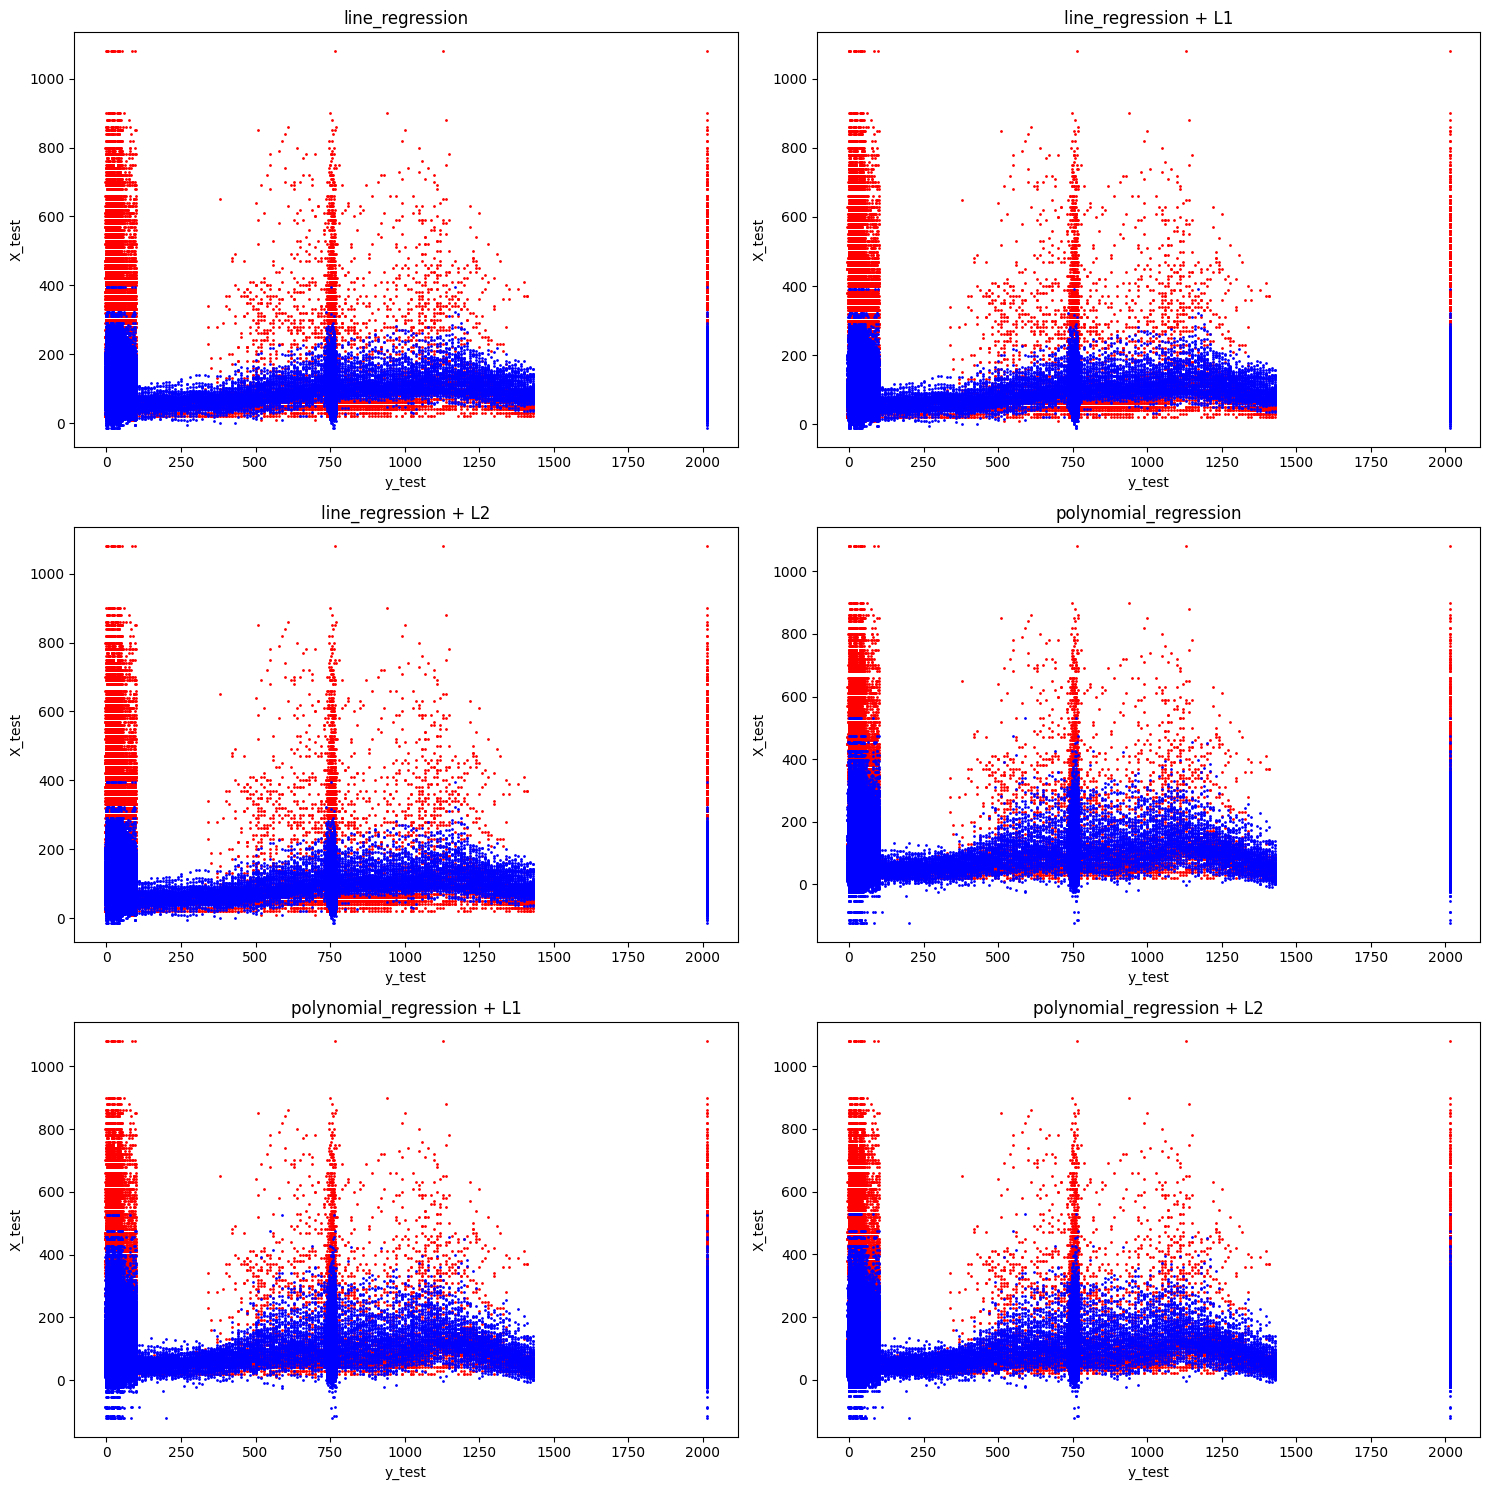

In [50]:
# fig, ax = plt.subplots()
# fig, axs = plt.subplots(2, 3)
fig = plt.figure(tight_layout=True)
fig.set_figheight(15)
fig.set_figwidth(15)
gs = gridspec.GridSpec(3, 2)
ax = fig.add_subplot(gs[0, 0])
ax.plot(X_test, y_test, 'ro', markersize=1)
ax.plot(X_test, line_regression_classic.predict(X_test), 'bo', markersize=1)
ax.set_ylabel('X_test')
ax.set_xlabel('y_test')
ax.set_title('line_regression')
#--------------------------------
ax = fig.add_subplot(gs[0, 1])
ax.plot(X_test, y_test, 'ro', markersize=1)
ax.plot(X_test, line_regression_ridge.predict(X_test), 'bo', markersize=1)
ax.set_ylabel('X_test')
ax.set_xlabel('y_test')
ax.set_title('line_regression + L1')
#--------------------------------
ax = fig.add_subplot(gs[1, 0])
ax.plot(X_test, y_test, 'ro', markersize=1)
ax.plot(X_test, line_regression_lasso.predict(X_test), 'bo', markersize=1)
ax.set_ylabel('X_test')
ax.set_xlabel('y_test')
ax.set_title('line_regression + L2')
#--------------------------------
ax = fig.add_subplot(gs[1, 1])
ax.plot(X_test, y_test, 'ro', markersize=1)
ax.plot(X_test, polynomial_regression_classic.predict(PolynomialFeatures(power).fit_transform(X_test)), 'bo', markersize=1)
ax.set_ylabel('X_test')
ax.set_xlabel('y_test')
ax.set_title('polynomial_regression')

#--------------------------------
ax = fig.add_subplot(gs[2, 0])
ax.plot(X_test, y_test, 'ro', markersize=1)
ax.plot(X_test, polynomial_regression_ridge.predict(PolynomialFeatures(power).fit_transform(X_test)), 'bo', markersize=1)
ax.set_ylabel('X_test')
ax.set_xlabel('y_test')
ax.set_title('polynomial_regression + L1')

#--------------------------------
ax = fig.add_subplot(gs[2, 1])
ax.plot(X_test, y_test, 'ro', markersize=1)
ax.plot(X_test, polynomial_regression_lasso.predict(PolynomialFeatures(power).fit_transform(X_test)), 'bo', markersize=1)
ax.set_ylabel('X_test')
ax.set_xlabel('y_test')
ax.set_title('polynomial_regression + L2')